Adversarial Attack

Example of Attack
加入杂讯的照片Attacked Image 和Benign Image输入到Network只差了一点点,杂讯是人肉眼无法看出的
Non-targeted:Anything other than "Cat"
Targeted:Misclassified as a specific class(e.g.,"Star Fish")
Network = ResNet-50
加入杂讯后可以变成任何想要的target,比如那个猫辨认成狗那个hhh
如果杂讯是人肉眼可见的,那还是有依据的.如果人肉眼看不出来十分微小的咨询,那就天差地别了
前提x和x^0的差距极小.not perceived by humans
1.L2-norm计算距离的平方 2.计算L-infinity:把每一个维度取绝对值然后找出最大值作为距离  无论是1还是2都要考虑到人类的感知距离
Change every pixel a little bit 和 Change one pixel much的L2是一样的,L-infinity是不一样的  Change one pixel much的L2很大.L-infinity是最接近人类的感知的更符合人类的需求.所以L-infinity才是限制条件
Non-targeted:L(x) = -e(y,y^)越小越好,即y和y^越大
Targeted:L(x) = -e(y,y^) + e(y,y^target)

Gradient Descent  只不过Update input, not parameters
从x0开始 For t = 1 to T 计算Gradient 计算x对loss的偏微分 Update image if d(x0,t) > 很小的值 fix(xt)->xt

Fast Gradient Sign Method(FGSM)
只Update一次参数,取sign只能取1 or -1,最后只能落在那个小方框的四个角落上 只能过simple baseline  多跑几个iteration就能过medium baseline了Iterative FGSM

上面都是White Box(In the previous attack,we know the network parameters)
白箱攻击如果是对应的模型是百分百错误.
不知道模型参数下的攻击叫Black Box Attack.

Black Box Attack
假设我们知道Training Data.我们可以训练一个Proxy Network来模仿要攻击的对象.作业里也是这样的.
如果不知道training data ? 可以把一堆图片丢进去,然后看输出什么.把输入输出的成对资料拿去训练一个模型.就有可能产生一个Proxy Network

Ensemble Attack
找到一个Network骗过其他的Network,那么也很容易骗过对应的Network

为什么这么容易被攻击?
原因是Data而不是Model.Features决定了机器学到的结论.(从一篇paper上面得到的结论)

One pixel attack:只动图片中的一个pixel(像素).有的错的还是很有道理的.
Universal Adversarial Attack: 用一个signal攻击所有的图片.之前都是客制化的.有一篇论文说明是有可能成功的.

Beyond Images:Speech processing:Detect synthesized speech  Natural language processing

Attack in the Physical World
1.其实真实世界里面需要考虑各种各样的角度,而不是一个固定的角度.Universal Attack是有可能成功的. 2.摄像头的解析度是有限的 3.是否真的能被做出来? 有一些颜色在物理世界和计算机的世界里是不一样的

Adversarial Reprogramming:寄生在某一个模型上.在图片外围加一些杂序然后丢入模型，这个模型就不会做原来的事情.

"Backdoor" in Model:Attack happens at the training phase.(模型开了一个后门,在测试的时候就会辨识错误)
Training data里面的图片和标注都是正常的,但是图片被attacked了
be careful of unknown dataset! 

Defense 
Passive Defense:在模型面前加一个Filter(e.g. Smoothing模糊化)因为某一个方向上某一种信号才能攻击成功.But,Confidence的分数会下降.所以模糊化不能太过头
Image Compression(压缩再解压缩)    Generator(重新产生),有办法控制Generator的输出,因为杂讯没有见过,所以无法复现,就没了
模糊化实际上就是底层第一步,如果别人知道,就可以很容易地躲过去.
Randomization:自己都不知道怎么变的.但是Universal Attack是有可能的.(各种变化方式都知道了)

Proactive Defense
Adversarial Training,一种Data Augmentation的方式.没有人攻击的时候也可以用这种方式来训练,避免overfitting,让模型robust的能力变得更好.并且这个process是可以反复做多次的.
在训练的阶段就进行攻击,用训练资料制造一些signal让图片具有攻击性,再把这些攻击的image标上正确的label,有了新的training data.用原来的和新的training data再重新训练模型,其实本质上就是Data Augmentation
但实际上用一种new algorithm也可能攻破Adversarial Training
有一些做法如Adversarial Training for Free 不使用额外的计算也可以达到相同的目标

In [26]:
!wget https://www.dropbox.com/s/lbpypqamqjpt2qz/data.zip

# unzip
!unzip ./data.zip

--2025-07-01 11:13:36--  https://www.dropbox.com/s/lbpypqamqjpt2qz/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hp1asboajakihzavykt5v/data.zip?rlkey=v9x0j0udqonkwccz2jpe2tkkf [following]
--2025-07-01 11:13:37--  https://www.dropbox.com/scl/fi/hp1asboajakihzavykt5v/data.zip?rlkey=v9x0j0udqonkwccz2jpe2tkkf
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03d7a07be134bfc0d9fe511cd5.dl.dropboxusercontent.com/cd/0/inline/Csr5E2zGRAueTYTdvchu0i3ftT8cZo8bdpaREWe11p1H_kXdQcew9XrxunFT6WCwJFvDYKOsn4F2jYwSLk699Qr_rip0ISA8LvKPoQxoPsWoMlv5flZwQJJoJ06hSECLCHO4WWom8vwT6FPI3kst7HPu/file# [following]
--2025-07-01 11:13:37--  https://uc03d7a07be134bfc0d9fe511cd5.dl.dropboxusercontent.com/cd/0/inline/Csr5E2zGRAueT

In [27]:
!rm ./data.zip

In [14]:
import torch
import torch.nn as nn
from pytorchcv.model_provider import get_model as ptcv_get_model
import random
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 8

def same_seeds(seed):
	  torch.manual_seed(seed)
	  if torch.cuda.is_available():
		    torch.cuda.manual_seed(seed)
		    torch.cuda.manual_seed_all(seed)
	  np.random.seed(seed)
	  random.seed(seed)
	  torch.backends.cudnn.benchmark = False
	  torch.backends.cudnn.deterministic = True
same_seeds(0) 

In [16]:
# the mean and std are the calculated statistics from cifar_10 dataset
cifar_10_mean = (0.491, 0.482, 0.447) # mean for the three channels of cifar_10 images
cifar_10_std = (0.202, 0.199, 0.201) # std for the three channels of cifar_10 images

# convert mean and std to 3-dimensional tensors for future operations
mean = torch.tensor(cifar_10_mean).to(device).view(3, 1, 1)
std = torch.tensor(cifar_10_std).to(device).view(3, 1, 1)

epsilon = 8/255/std

In [29]:
root = '/kaggle/input/homework10-dataset/data' # directory for storing benign images
# benign images: images which do not contain adversarial perturbations
# adversarial images: images which include adversarial perturbations

In [30]:
import os
import glob
import shutil
import numpy as np
from PIL import Image
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar_10_mean, cifar_10_std)
])

class AdvDataset(Dataset):
    def __init__(self, data_dir, transform):
        self.images = []
        self.labels = []
        self.names = []
        '''
        data_dir
        ├── class_dir
        │   ├── class1.png
        │   ├── ...
        │   ├── class20.png
        '''
        for i, class_dir in enumerate(sorted(glob.glob(f'{data_dir}/*'))):
            images = sorted(glob.glob(f'{class_dir}/*'))
            self.images += images
            self.labels += ([i] * len(images))
            self.names += [os.path.relpath(imgs, data_dir) for imgs in images]
        self.transform = transform
    def __getitem__(self, idx):
        image = self.transform(Image.open(self.images[idx]))
        label = self.labels[idx]
        return image, label
    def __getname__(self):
        return self.names
    def __len__(self):
        return len(self.images)

adv_set = AdvDataset(root, transform=transform)
adv_names = adv_set.__getname__()
adv_loader = DataLoader(adv_set, batch_size=batch_size, shuffle=False)

print(f'number of images = {adv_set.__len__()}')

number of images = 200


In [31]:
# to evaluate the performance of model on benign images
def epoch_benign(model, loader, loss_fn):
    model.eval()
    train_acc, train_loss = 0.0, 0.0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        yp = model(x)
        loss = loss_fn(yp, y)
        train_acc += (yp.argmax(dim=1) == y).sum().item()
        train_loss += loss.item() * x.shape[0]
    return train_acc / len(loader.dataset), train_loss / len(loader.dataset)

In [32]:
# perform fgsm attack
def fgsm(model, x, y, loss_fn, epsilon=0.03):
    # Fast Gradient Sign Method (FGSM) 对抗攻击
    x_adv = x.detach().clone() # 保持原始图像的副本
    x_adv.requires_grad = True # 需要计算梯度
    loss = loss_fn(model(x_adv), y) # 前向传播计算损失
    loss.backward() # 反向传播计算梯度
    # FGSM攻击：沿着梯度符号方向添加扰动
    grad = x_adv.grad.detach()
    x_adv = x_adv + epsilon * grad.sign()

    # 确保像素值在合法范围内[0,1]
    x_adv = torch.clamp(x_adv, 0, 1)
    
    return x_adv



def ifgsm(model, x, y, loss_fn, epsilon=0.03, alpha=0.01, num_iter=20):
    x_adv = x.detach().clone()
    ################ TODO: Medium baseline #######################
    # write a loop with num_iter times
    for i in range(num_iter):
      # TODO: Each iteration, execute fgsm
        x_adv.requires_grad = True
        
        # 计算损失和梯度
        loss = loss_fn(model(x_adv), y)
        loss.backward()
        
        # 沿梯度方向添加小扰动
        grad_sign = x_adv.grad.detach().sign()
        x_adv = x_adv + alpha * grad_sign
        
        # 投影到epsilon邻域内(确保总扰动不超过epsilon)
        delta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + delta, 0, 1).detach()    
        

    return x_adv

def mifgsm(model, x, y, loss_fn, epsilon=0.03, alpha=0.01, num_iter=20, decay=0.9):
    x_adv = x.detach().clone().to(device)
    # initialze momentum tensor
    momentum = torch.zeros_like(x).detach().to(device)

    ################ TODO: Strong baseline ####################
    for i in range(num_iter):
      # TODO: Refer to the algorithm of MI-FGSM
      # Calculate the momentum and update
        x_adv.requires_grad = True
            
        # 计算损失和梯度
        loss = loss_fn(model(x_adv), y)
        loss.backward()
        
        # 更新动量项
        grad = x_adv.grad.detach()
        grad_norm = torch.norm(grad.view(grad.shape[0], -1), p=1, dim=1).view(-1, 1, 1, 1)
        grad_normalized = grad / (grad_norm + 1e-12)  # 避免除以零
        momentum = decay * momentum + grad_normalized
        
        # 沿动量方向添加扰动
        x_adv = x_adv + alpha * momentum.sign()
        
        # 投影到epsilon邻域内
        delta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + delta, 0, 1).detach()  
  
    return x_adv

In [33]:
# perform adversarial attack and generate adversarial examples
def gen_adv_examples(model, loader, attack, loss_fn):
    model.eval()
    adv_names = []
    train_acc, train_loss = 0.0, 0.0
    for i, (x, y) in enumerate(loader):
        x, y = x.to(device), y.to(device)
        x_adv = attack(model, x, y, loss_fn) # obtain adversarial examples
        yp = model(x_adv)
        loss = loss_fn(yp, y)
        train_acc += (yp.argmax(dim=1) == y).sum().item()
        train_loss += loss.item() * x.shape[0]
        # store adversarial examples
        adv_ex = ((x_adv) * std + mean).clamp(0, 1) # to 0-1 scale
        adv_ex = (adv_ex * 255).clamp(0, 255) # 0-255 scale
        adv_ex = adv_ex.detach().cpu().data.numpy().round() # round to remove decimal part
        adv_ex = adv_ex.transpose((0, 2, 3, 1)) # transpose (bs, C, H, W) back to (bs, H, W, C)
        adv_examples = adv_ex if i == 0 else np.r_[adv_examples, adv_ex]
    return adv_examples, train_acc / len(loader.dataset), train_loss / len(loader.dataset)

# create directory which stores adversarial examples
def create_dir(data_dir, adv_dir, adv_examples, adv_names):
    if os.path.exists(adv_dir) is not True:
        _ = shutil.copytree(data_dir, adv_dir)
    for example, name in zip(adv_examples, adv_names):
        im = Image.fromarray(example.astype(np.uint8)) # image pixel value should be unsigned int
        im.save(os.path.join(adv_dir, name))

In [34]:
# This function is used to check whether you use models pretrained on cifar10 instead of other datasets
def model_checker(model_name):
  assert ('cifar10' in model_name) and ('cifar100' not in model_name), 'The model selected is not pretrained on cifar10!'

In [10]:
!pip install pytorchcv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 3.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 14.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled

In [35]:
from pytorchcv.model_provider import get_model as ptcv_get_model

model_name = 'resnet110_cifar10'
model_checker(model_name)


model = ptcv_get_model(model_name, pretrained=True).to(device)
loss_fn = nn.CrossEntropyLoss()

benign_acc, benign_loss = epoch_benign(model, adv_loader, loss_fn)
print(f'benign_acc = {benign_acc:.5f}, benign_loss = {benign_loss:.5f}')

benign_acc = 0.95000, benign_loss = 0.22678


In [36]:
adv_examples, fgsm_acc, fgsm_loss = gen_adv_examples(model, adv_loader, fgsm, loss_fn)
print(f'fgsm_acc = {fgsm_acc:.5f}, fgsm_loss = {fgsm_loss:.5f}')

create_dir(root, 'fgsm', adv_examples, adv_names)

fgsm_acc = 0.53500, fgsm_loss = 2.45530


In [37]:
%cd fgsm
!tar zcvf ../fgsm.tgz *
%cd ..

/kaggle/working/fgsm
airplane/
airplane/airplane9.png
airplane/airplane10.png
airplane/airplane11.png
airplane/airplane5.png
airplane/airplane20.png
airplane/airplane2.png
airplane/airplane16.png
airplane/airplane15.png
airplane/airplane7.png
airplane/airplane4.png
airplane/airplane17.png
airplane/airplane1.png
airplane/airplane19.png
airplane/airplane14.png
airplane/airplane18.png
airplane/airplane13.png
airplane/airplane6.png
airplane/airplane12.png
airplane/airplane3.png
airplane/airplane8.png
automobile/
automobile/automobile2.png
automobile/automobile18.png
automobile/automobile19.png
automobile/automobile20.png
automobile/automobile14.png
automobile/automobile8.png
automobile/automobile9.png
automobile/automobile3.png
automobile/automobile12.png
automobile/automobile6.png
automobile/automobile5.png
automobile/automobile15.png
automobile/automobile1.png
automobile/automobile10.png
automobile/automobile7.png
automobile/automobile17.png
automobile/automobile16.png
automobile/automob

In [39]:
################ BOSS BASELINE ######################

class ensembleNet(nn.Module):
    def __init__(self, model_names):
        super().__init__()
        self.models = nn.ModuleList([ptcv_get_model(name, pretrained=True) for name in model_names])
        
    def forward(self, x):
        #################### TODO: boss baseline ###################
        with torch.no_grad():
            logits_list = []
            
            # TODO: sum up logits from multiple models  
            # return ensemble_logits
            for i, m in enumerate(self.models):
                logits = model(x)
                logits_list.append(logits)


            ensemble_logits = torch.stack(logits_list).mean(dim = 0)

        return ensemble_logits
        

In [40]:
model_names = [
    'nin_cifar10',
]

for model_name in model_names:
  model_checker(model_name)

ensemble_model = ensembleNet(model_names).to(device)
ensemble_model.eval()

ensembleNet(
  (models): ModuleList(
    (0): CIFARNIN(
      (features): Sequential(
        (stage1): Sequential(
          (unit1): NINConv(
            (conv): Conv2d(3, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
            (activ): ReLU(inplace=True)
          )
          (unit2): NINConv(
            (conv): Conv2d(192, 160, kernel_size=(1, 1), stride=(1, 1))
            (activ): ReLU(inplace=True)
          )
          (unit3): NINConv(
            (conv): Conv2d(160, 96, kernel_size=(1, 1), stride=(1, 1))
            (activ): ReLU(inplace=True)
          )
        )
        (stage2): Sequential(
          (pool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (dropout2): Dropout(p=0.5, inplace=False)
          (unit1): NINConv(
            (conv): Conv2d(96, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
            (activ): ReLU(inplace=True)
          )
          (unit2): NINConv(
            (conv): Conv2d(192, 19

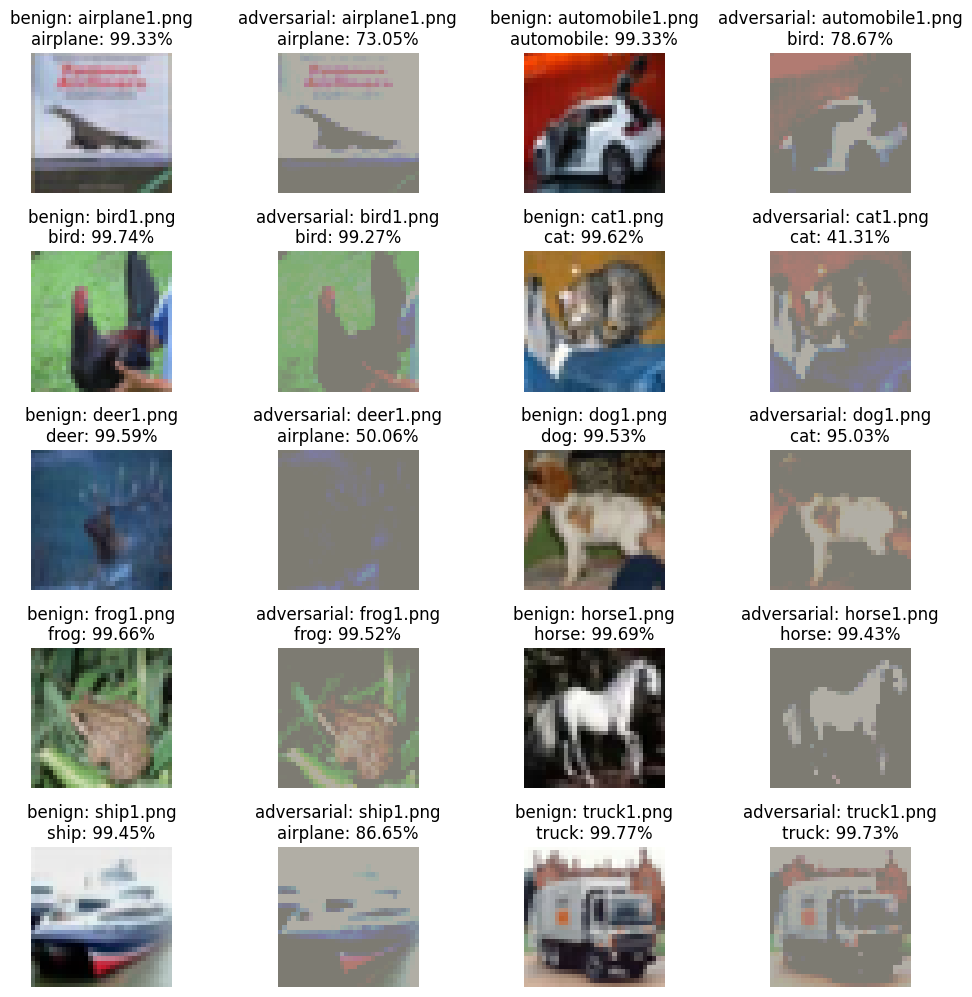

In [41]:
import matplotlib.pyplot as plt

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 20))
cnt = 0
for i, cls_name in enumerate(classes):
    path = f'{cls_name}/{cls_name}1.png'
    # benign image
    cnt += 1
    plt.subplot(len(classes), 4, cnt)
    im = Image.open(f'./data/{path}')
    logit = model(transform(im).unsqueeze(0).to(device))[0]
    predict = logit.argmax(-1).item()
    prob = logit.softmax(-1)[predict].item()
    plt.title(f'benign: {cls_name}1.png\n{classes[predict]}: {prob:.2%}')
    plt.axis('off')
    plt.imshow(np.array(im))
    # adversarial image
    cnt += 1
    plt.subplot(len(classes), 4, cnt)
    im = Image.open(f'./fgsm/{path}')
    logit = model(transform(im).unsqueeze(0).to(device))[0]
    predict = logit.argmax(-1).item()
    prob = logit.softmax(-1)[predict].item()
    plt.title(f'adversarial: {cls_name}1.png\n{classes[predict]}: {prob:.2%}')
    plt.axis('off')
    plt.imshow(np.array(im))
plt.tight_layout()
plt.show()

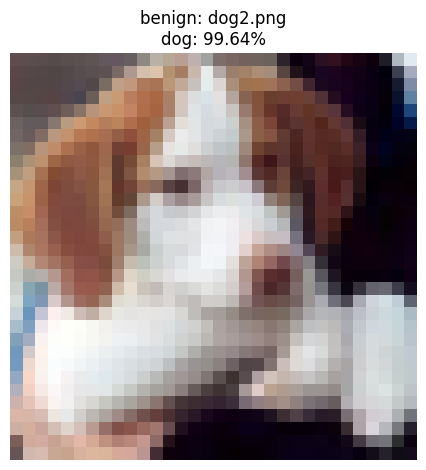

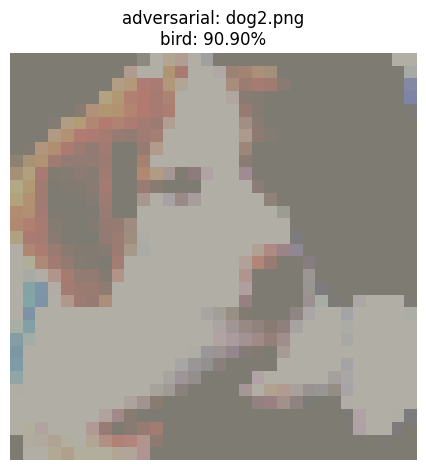

In [43]:
# original image
path = f'dog/dog2.png'
im = Image.open(f'/kaggle/input/homework10-dataset/data/{path}')
logit = model(transform(im).unsqueeze(0).to(device))[0]
predict = logit.argmax(-1).item()
prob = logit.softmax(-1)[predict].item()
plt.title(f'benign: dog2.png\n{classes[predict]}: {prob:.2%}')
plt.axis('off')
plt.imshow(np.array(im))
plt.tight_layout()
plt.show()

# adversarial image 
adv_im = Image.open(f'/kaggle/working/fgsm/{path}')
logit = model(transform(adv_im).unsqueeze(0).to(device))[0]
predict = logit.argmax(-1).item()
prob = logit.softmax(-1)[predict].item()
plt.title(f'adversarial: dog2.png\n{classes[predict]}: {prob:.2%}')
plt.axis('off')
plt.imshow(np.array(adv_im))
plt.tight_layout()
plt.show()

In [50]:
pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 12.8 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
# 1. 安装完整中文字体包（包含所有CJK字符）
!apt-get install -y fonts-noto-cjk fonts-noto-cjk-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
The following NEW packages will be installed:
  fonts-noto-cjk-extra
0 upgraded, 1 newly installed, 0 to remove and 87 not upgraded.
Need to get 145 MB of archives.
After this operation, 219 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk-extra all 1:20220127+repack1-1 [145 MB]
Fetched 145 MB in 9s (16.9 MB/s)                                                                    
Selecting previously unselected package fonts-noto-cjk-extra.
(Reading database ... 129199 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk-extra_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk-extra (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk-extra (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ..

当前字体: ['Noto Sans CJK SC']


/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 32553 (\N{CJK UNIFIED IDEOGRAPH-7F29}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 25239 (\N{CJK UNIFIED IDEOGRAPH-6297}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1573368541.py:45: UserWarning: Glyph 36136 (\N{CJK UNIFIED IDEOGRAPH-8D28}) missing from current font.
  plt.tight_layout()
/tmp/i

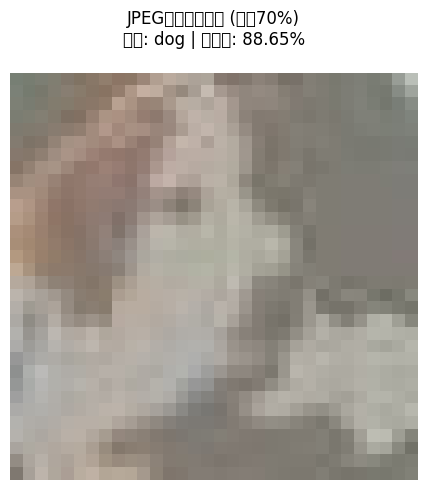

In [60]:
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC']
plt.rcParams['axes.unicode_minus'] = False
# 验证字体是否生效
print("当前字体:", plt.rcParams['font.sans-serif'])

# pre-process image
x = transforms.ToTensor()(adv_im)*255
x = x.permute(1, 2, 0).numpy()
x = x.astype(np.uint8)


# TODO: use "imgaug" package to perform JPEG compression (compression rate = 70)
# compressed_x =  ... x .. 
def jpeg_compress(image, compression_rate = 70):
    compression = 100 - compression_rate
    seq = iaa.Sequential([
        iaa.JpegCompression(compression)
    ])
    return seq.augment_image(image)
compressed_x = jpeg_compress(x,compression_rate = 70)
transform = transforms.Compose([
    transforms.ToTensor(), # 自动转换为[0,1]范围
    transforms.Normalize(mean = [0.485, 0.456, 0.406], # ImageNet标准归一化
    std=[0.229, 0.224, 0.225])
])
input_tensor = transform(compressed_x).unsqueeze(0).to(device)  # 添加batch维度
with torch.no_grad():
    logit = model(input_tensor)[0]
    predict = logit.argmax(-1).item()
    prob = logit.softmax(-1)[predict].item()


plt.figure(figsize=(10, 5))
plt.imshow(compressed_x)
plt.title(
    f'JPEG压缩对抗样本 (质量70%)\n预测: {classes[predict]} | 置信度: {prob:.2%}',
    fontsize=12, pad=20
)
plt.axis('off')
plt.tight_layout()
plt.show()